# Random walks

Random walks are an essential building blocks in stochastics but also in Xenakis music and are used in macro- and microcomposition.
Before we use it in a sonic environment we want to explore them in a formalistic and programming manner.
We start by taking a look at the classical symmteric random walk followed by the random walk with boundaries.
This will then allow us to understand the notion of *2nd order random walk* which uses Xenakis in his Stochastic Synthesis which can be heard in such compositions as Gendy 3 (1991).

The programming language for this chapter will be Python as some plotting is easier in this language.

The chapter is based on {cite}`scheiba15` and {cite}`sergioluque2006`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from IPython.display import display, Audio

mpl.rcParams['figure.figsize'] = (15, 5)

np.random.seed(42)

## Formal introduction of random walks

For now we restrict ourselves to symmetric random walks, which mean they are as likely to go up as they are likely to go down, and therefore both options have a chance of $50\%$.

We therefore start by defining our steps $(Y_n)_{n \in \mathbb{N}}$ of our random walk $X = (X_n)_{n \in \mathbb{N}_0}$.
Each $(Y_n)_{n \in \mathbb{N}}$ must be independent of each other and must obey the same distribution

$$
\mathbb{P}[Y_n = 1] = 0.5 = \mathbb{P}[Y_n = -1]
$$

We define that our random walk starts at $0$, so $X_0 = 0$ and each following step is defined by

$$
X_n = \sum_{i=1}^n Y_i
$$

As we now have the formal definition we can try this out in practice by programming it in Python.

In [ ]:
# 10 numbers of either -1 or 1
y = np.random.choice([-1, 1], size=10)
y

array([-1,  1, -1, -1, -1,  1, -1, -1, -1,  1])

In [ ]:
# sum them up using cumulative sum
x = np.cumsum(y)
x

array([-1,  0, -1, -2, -3, -2, -3, -4, -5, -4])

The intuition behind random walks comes a bit clearer when we begin to plot them.

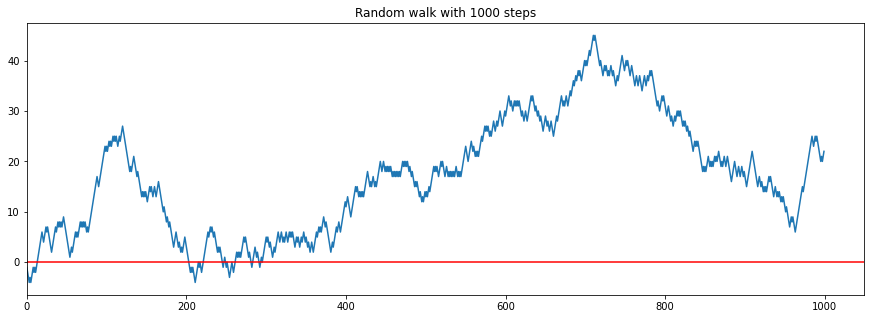

In [ ]:
def random_walk(steps: int):
	y = np.random.choice([-1, 1], size=steps)
	x = np.cumsum(y)
	return x

steps = 1000
x = random_walk(steps)
plt.plot(x)
plt.axhline(0.0, c='r')
plt.xlim(left=0)
plt.title(f"Random walk with {steps} steps");

Each successive point either goes up or down by $1$.

We can also run multiple random walks next to each other.

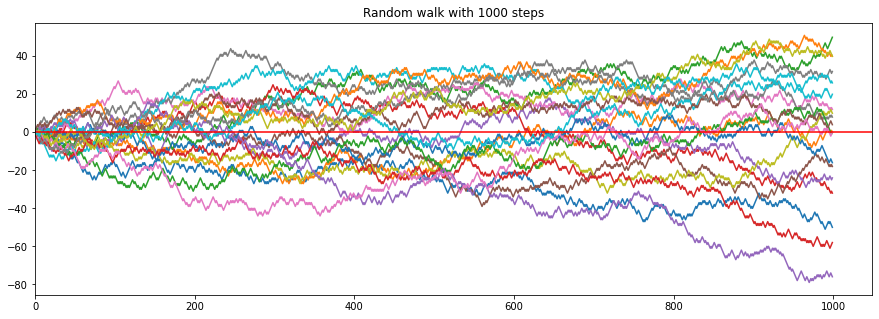

In [ ]:
steps = 1000
for i in range(20):
	x = random_walk(steps)
	plt.plot(x)
plt.axhline(0.0, c='r')
plt.xlim(left=0)
plt.title(f"Random walk with {steps} steps");

Although we go $10'000$ steps in vertical movement the lateral movement rarely exceeds 100 - althogh it is also possible that it is reaches $10'000$ (everytime it goes to the up-direction), but this is highely unlikely - we can even calculate this.

As all $(Y_n)_{n \in \mathbb{N}}$ are independent we can simply multiplying every time the possibility of going up which is $\frac{1}{2}$, therefore

$$
\mathbb{P}[X_{10'000}=10'000] = \underbrace{\frac{1}{2} \cdot \frac{1}{2} \cdots \frac{1}{2}}_{10'000\text{ times}} = \frac{1}{2^{10'000}} \approx 5.0 \times 10^{-3011}
$$

which is a number with over 3000 zeros after the dot.

We note that $\mathbb{P}[X_{10'000}=10'001]=0.0$ because it is impossible to sum up $10'000$ possible $1$ s to $10'001$ when starting from $X_0 = 0$.

## Random walk with barriers

We can also restrict the domain of random walk $(X_n)_{n \in \mathbb{N}}$ to be between $-l < (X_n)_{n \in \mathbb{N}} < l$ for a given $l \in \mathbb{N}$.
This seemingly small changes makes the formalism a bit more complicated because if we hit the barrier $l$ our decission is not random anymore as we are not allowed to exceed the boundary and therefore have to go into the opposite direction of the barrier.
Therefore our random variables $(Y_n)_{n \in \mathbb{N}}$ are **not independent anymore** as they now depend on each other.
A way to solve this is by defining random variables not as above but via markov chains.

We define the event space for our markov chain via $E = \mathbb{Z}$.
For $p\in(0, 1)$ is the transitin matrix $A$ with a state $i \in E$ defined via

$$
a_{i, i+1} = p = 1-a_{i, i-1}
$$

and elsewhere $0$.
For $p=0.5$ the markov chain is equal to the single dimensional random walk as defined above.
Therefore is the random walk only a special case of a markov chain.
The transition matrix $A$ looks therefore like

$$
A = \begin{bmatrix}
\ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\
\dots & a_{2, -2} & a_{2, -1} & a_{2, 0} & a_{2, 1} & a_{2, 2} & \dots \\
\dots & a_{1, -2} & a_{1, -1} & a_{1, 0} & a_{1, 1} & a_{1, 2} & \dots \\
\dots & a_{0, -2} & a_{0, -1} & a_{0, 0} & a_{0, 1} & a_{0, 2} & \dots \\
\dots & a_{-1, -2} & a_{-1, -1} & a_{-1, 0} & a_{-1, 1} & a_{-1, 2} & \dots \\
\dots & a_{-2, -2} & a_{-2, -1} & a_{-2, 0} & a_{-2, 1} & a_{-2, 2} & \dots \\
\ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\
\end{bmatrix} 
= \begin{bmatrix}
\ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\
\dots & 0 & 0 & 0 & 0.5 & 0 & \dots \\
\dots & 0 & 0 & 0.5 & 0 & 0.5 & \dots \\
\dots & 0 & 0.5 & 0 & 0.5 & 0 & \dots \\
\dots & 0.5 & 0 & 0.5 & 0 & 0 & \dots \\
\dots & 0 & 0.5 & 0 & 0 & 0 & \dots \\
\ddots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\
\end{bmatrix}
$$

But the notion of the event space allows us to change the modify the transition matrix as we can now implement a limit.
For a given $l \in \mathbb{Z}$ we modify the transitin matrix $A$ with

$$
a_{i, i+1} = \begin{cases}
0~&\text{if}~i=l\\
1~&\text{if}~i=-l\\
p~&\text{else}\\
\end{cases}
~~~~~~~~~~
a_{i, i-1} = \begin{cases}
0~&\text{if}~i=-l\\
1~&\text{if}~i=l\\
p~&\text{else}\\
\end{cases}
$$

We will only implement an imperative way to implement such a limited random walk, but it could be also implemented as a markov chain.

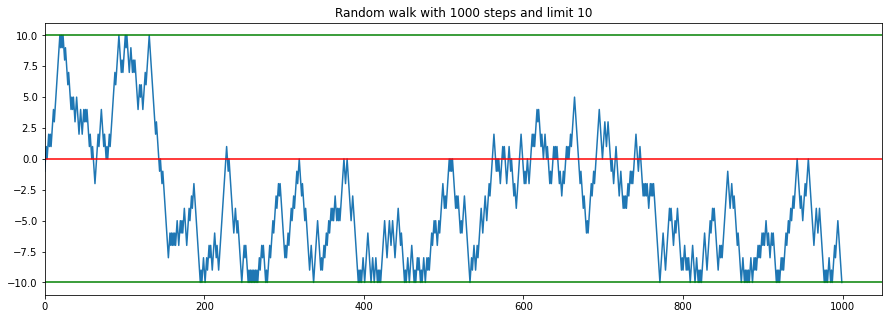

In [ ]:
def random_walk_boundary(steps: int, limit: int):
	y = []
	x_cur = 0
	step_size = 1

	for _ in range(steps):
		# check if we hit a barrier
		if np.abs(x_cur) + step_size > limit:
			step = np.sign(x_cur) * (-1 * step_size)
		else:
			step = np.random.choice([step_size, -1*step_size])
		x_cur += step
		y.append(step)

	x = np.cumsum(y)
	return x

steps = 1000
limit = 10

x = random_walk_boundary(steps, limit)
plt.plot(x)
plt.axhline(0.0, c='r')
for l in [limit, -1*limit]:
	plt.axhline(l, c='g')
plt.xlim(left=0)
plt.title(f"Random walk with {steps} steps and limit {limit}");

## Second order random walks

Before we define second random order walks we will take a look at why Xenakis introduced those and why traditional random walks are not sufficient.
For this we will take a look at the distribution (we will count how often each stage of the random walk is passed) of two very longe traditional random walks, one limited, the other not.

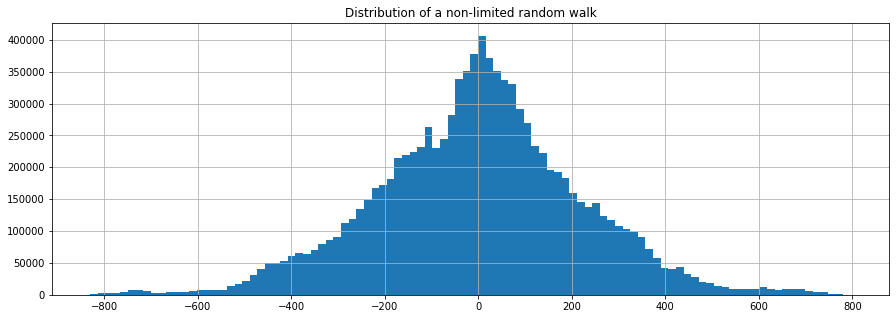

In [ ]:
x = []
for _ in range(100):
	x.append(random_walk(100000))
x = np.concatenate(x)
pd.Series(x).hist(bins=100)
plt.title("Distribution of a non-limited random walk");

We see that the traditional random walk fluctuates around $0$ most of the time and looks like a gaussian distribution.
This phonomenon is described by the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

Text(0.5, 1.0, 'Distribution of a limited random walk')

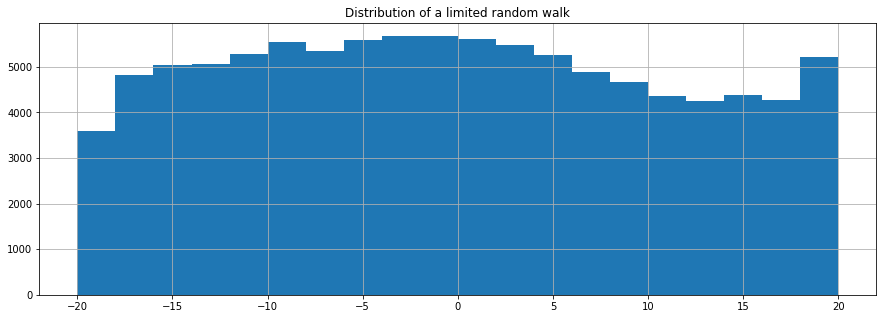

In [ ]:
x = []
for _ in range(100):
	x.append(random_walk_boundary(1000, limit=20))
x = np.concatenate(x)
pd.Series(x).hist(bins=20)
plt.title("Distribution of a limited random walk")

The limited random walk would eventually yield the same result from above if we run it enough times, but as its barriers reflect we would have to do this much longer.

Why do we take a look at the distributions??

We only get noise from it, see.

In [ ]:
sample_rate = 48000
# 16 bits divided by 2 (b/c we need to cover + and -)
amp = ((2**16)/2)*0.4

x = random_walk(sample_rate*4)
# scale x to be between -1 and 1
x = x/np.max(np.abs(x))
display(Audio(data=(x*amp).astype(np.int16) , rate=sample_rate))

This generates only 4 seconds of noise.

In [ ]:
x = random_walk_boundary(sample_rate*4, limit=200)
# scale x to be between -1 and 1
x = x/np.max(np.abs(x))
display(Audio(data=(x*amp).astype(np.int16) , rate=sample_rate))

Even the random walk which has a boundary only consists of noise.
This is because the structure of our data is too random (see [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))).

So is the idea of using random walks as sound waves not very fruitful and failed?
Not if we decide to go for a second order random walk.

The idea is basically this: We have start with a traditional random walks $(Y_n)_{n \in \mathbb{N}}$.
But instead of using it directy we will use it in another random walk $(X_n)_{n \in \mathbb{N}}$.
Note that we originally always go up either by 1 or down by 1?
We will simply go down or up as many steps as the random walk $(Y_n)_{n \in \mathbb{N}}$ tells us, therefore

$$
X_{n+1} = X_n + Y_n
$$

Xenakis will also add a boundary for this *secondary order random walk* $(X_n)_{n \in \mathbb{N}}$.

Lets strat programming it.

Text(0.5, 1.0, 'Second order random walk')

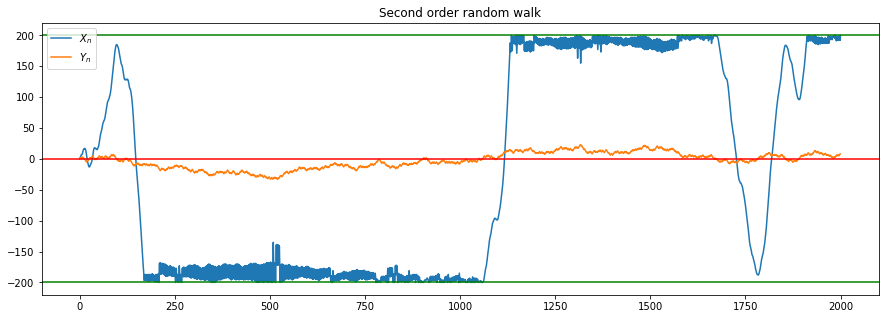

In [ ]:
def second_order_random_walk(steps: int, limit: int):
    # start at 0
    xs = [0]
    ys = random_walk(steps)
    for y in ys:
        next_step = xs[-1] + y
        if np.abs(next_step) > limit:
            # invert the movement of the step if we would exceed
            # the barrier
            next_step = xs[-1] + (np.sign(y) * (-1)) * np.abs(y)
        xs.append(next_step)
    return np.array(xs), ys

limit = 200

x, y = second_order_random_walk(2000, limit)
plt.plot(x, label="$X_n$")
plt.plot(y, label="$Y_n$")
plt.legend()
plt.axhline(0.0, c='r')
for l in [limit, -1*limit]:
	plt.axhline(l, c='g')
plt.title("Second order random walk")

We note that it is possible to still exceed the limits if the values of $(Y_n)_{n \in \mathbb{N}}$ exceed $2l$ as then the movement against the actual direction exceeds the boundary on the other side.

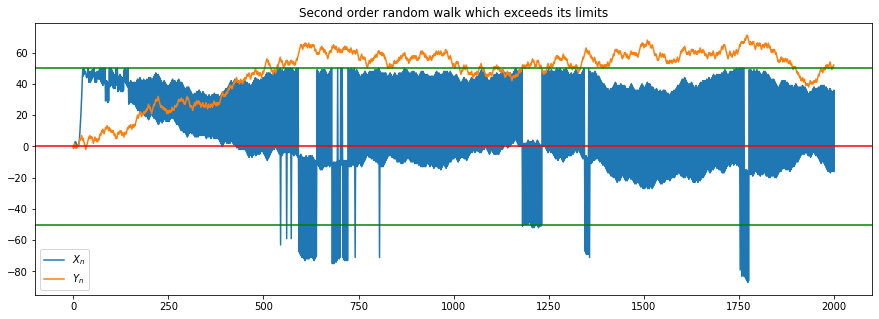

In [ ]:
limit = 50

# keeps the randomness reproducible
np.random.seed(40)

x, y = second_order_random_walk(2000, limit)
plt.plot(x, label="$X_n$")
plt.plot(y, label="$Y_n$")
plt.legend()
plt.axhline(0.0, c='r')
for l in [limit, -1*limit]:
	plt.axhline(l, c='g')
plt.title("Second order random walk which exceeds its limits");

To avoid this we can also use a limit $l$ on $(Y_n)_{n \in \mathbb{N}}$ as well.
Note that a different behaviour such as going $1$ into the other direction can still lead to bugs as this would allow us to go $2l$ steps into the undesired direction if $(Y_n)_{n \in \mathbb{N}}$ exceeds $l$ for a period of at least $2l$ times.
This restriction is not made by Xenakis.

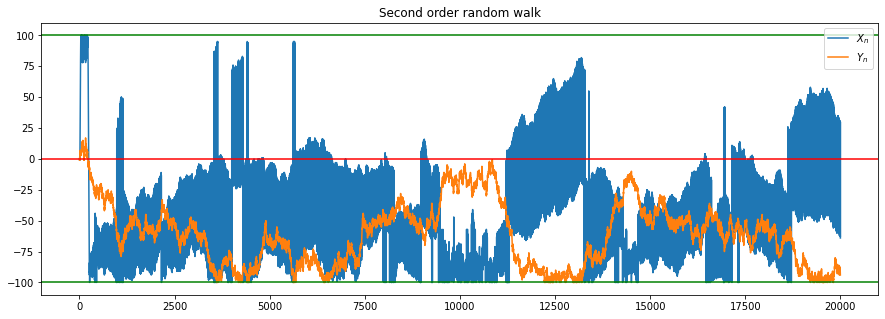

In [ ]:
def second_order_random_walk(steps: int, limit: int):
    # start at 0
    xs = [0]
    ys = random_walk_boundary(steps, limit)
    for y in ys:
        next_step = xs[-1] + y
        if np.abs(next_step) > limit:
            # invert the movement of the step if we would exceed
            # the barrier
            next_step = xs[-1] + (np.sign(y) * (-1)) * np.abs(y)
        xs.append(next_step)
    return np.array(xs), ys

limit = 100

x, y = second_order_random_walk(20000, limit)
plt.plot(x, label="$X_n$")
plt.plot(y, label="$Y_n$")
plt.legend()
plt.axhline(0.0, c='r')
for l in [limit, -1*limit]:
	plt.axhline(l, c='g')
plt.title("Second order random walk");

Lets take a look at the distribution of the second order random walk.

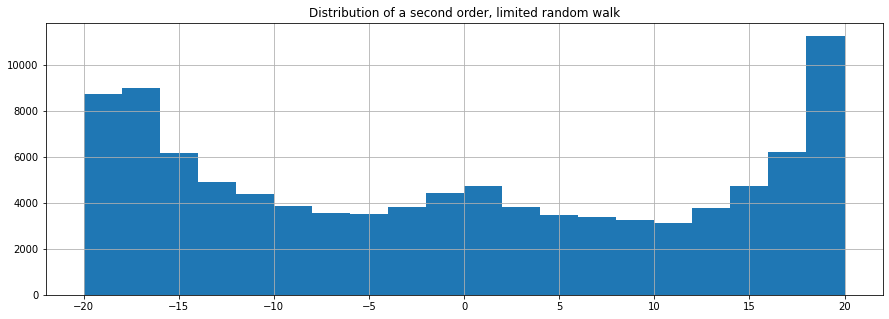

In [ ]:
x = []
for _ in range(10):
	x.append(second_order_random_walk(10000, limit=20)[0])
x = np.concatenate(x)
pd.Series(x).hist(bins=20)
plt.title("Distribution of a second order, limited random walk");

We see that the boundaries of the random walk are much more dominant in the distribution and therefore our signal has less entropy and is therefore less noise.
Lets listen to it.

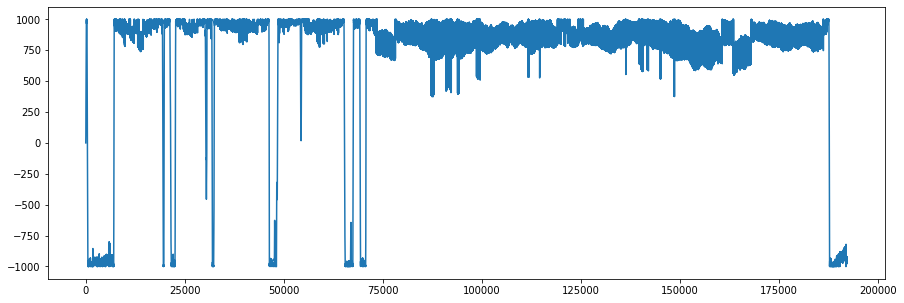

In [ ]:
x, _ = second_order_random_walk(sample_rate*4, limit=1000)
# scale x to be between -1 and 1
plt.plot(x)
x = x/np.max(np.abs(x))
display(Audio(data=(x*amp).astype(np.int16) , rate=sample_rate))

This introduces now much more transients and a chaotic feel to it, albeit it is *less* random.